# Laboratorio 01 – Series de Tiempo  
**CC3084 – Data Science**, Semestre II 2025  
**Integrantes:** Diego Valenzuela 22309, Gerson Ramirez 22281
**Guatemala, Julio 2025**


In [ ]:
import pandas as pd

file_path = './Estadisticas_historicas_comercializacion.xlsx'

sheets = pd.read_excel(file_path,
                       sheet_name=['IMPORTACION','CONSUMO'],
                       header=6)
df_imp  = sheets['IMPORTACION'].dropna(axis=1, how='all')
df_cons = sheets['CONSUMO'].dropna(axis=1, how='all')

for df in (df_imp, df_cons):
    df.columns = df.columns.str.strip()
    df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')
    df.dropna(subset=['Fecha'], inplace=True)
    df.reset_index(drop=True, inplace=True)



Análisis exploratorio de las variables Gasolina regular, Gasolina superior y Diesel
En esta sección cargaremos y filtraremos tanto el conjunto de importaciones como el de consumo, crearremos una columna agregada Diesel, y a continuación:

Obtendremos estadísticas descriptivas de cada variable.

Exploraremos su distribución con histogramas y curvas KDE.

Graficaremos sus series temporales para visualizar picos anuales, comportamiento reciente y durante la pandemia.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Diesel'] = df['Diesel bajo azufre'] + df['Diesel ultra bajo azufre'] + df['Diesel alto azufre']
imp = df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel']]

imp[['Gasolina regular', 'Gasolina superior', 'Diesel']].describe()

for col in ['Gasolina regular', 'Gasolina superior', 'Diesel']:
    sns.histplot(imp[col], kde=True)
    plt.title(f'Distribución {col}')
    plt.show()

imp.set_index('Fecha').plot(figsize=(12,5), title='Importaciones por tipo de combustible')
plt.show()


## Análisis de los resultados exploratorios

### 1. Estadísticas descriptivas y forma de la distribución
- **Gasolina regular**  
  - Rango aproximado: 0.1 – 1.1 millones de unidades.  
  - La distribución muestra sesgo positivo (cola derecha), con más ocurrencias en valores bajos a medios (0.1–0.4 M) y algunos picos altos.  
  - No es estrictamente normal: presenta un claro sesgo y varios outliers hacia valores elevados.

- **Gasolina superior**  
  - Rango aproximado: 0.2 – 1.2 millones de unidades.  
  - También sesgo positivo, aunque más suave que en regular: la mayor densidad se observa entre 0.3–0.6 M.  
  - Aparecen valores extremos por encima de 0.8 M ocasionando una cola larga.

- **Diesel**  
  - Rango aproximado: 0.3 – 1.6 millones de unidades.  
  - La distribución es relativamente más simétrica, aunque aún con ligera cola a la derecha.  
  - Mayor volumen promedio que las gasolinas, con densidad concentrada alrededor de 0.8–1.2 M.

### 2. Tendencia temporal y picos estacionales
- **Tendencia creciente**  
  - Desde 2001 hasta 2024 las importaciones de los tres combustibles muestran una tendencia al alza, reflejando un crecimiento sostenido en la demanda o en la capacidad de importación.
  
- **Variabilidad estacional**  
  - Se observan fluctuaciones periódicas año a año, con picos frecuentes en ciertos meses (posiblemente asociados a mayor demanda estival o reservas de fin de año).
  
- **Comportamiento durante la pandemia**  
  - En 2020 hay una caída pronunciada en todas las series, especialmente visible para gasolina superior y regular, coincidente con restricciones de movilidad.  
  - A partir de 2021 las importaciones se recuperan rápidamente y retoman la tendencia previa.

- **Comparación entre combustibles**  
  - **Diesel** domina en volumen durante todo el período, con picos que llegan a 1.5–1.6 M.  
  - **Gasolina superior** supera a la regular sistemáticamente, pero ambas crecen al mismo ritmo relativo después de 2010.  
  - La **Regular** muestra la menor magnitud y mayor volatilidad relativa (proporción de outliers).


Regular_imp — Inicio: 1970-01-01, Fin: 1970-01-01, Frecuencia: Mensual


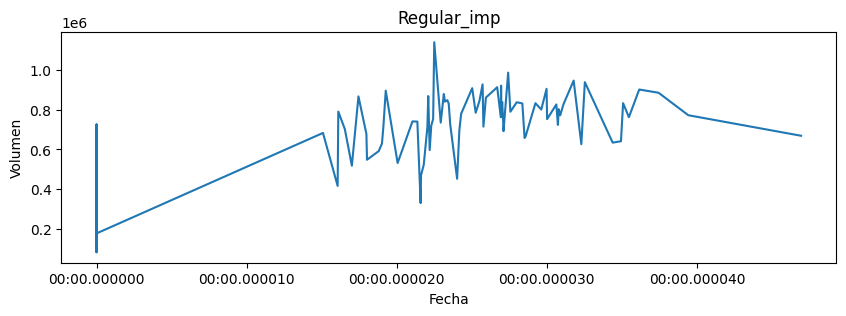

Superior_imp — Inicio: 1970-01-01, Fin: 1970-01-01, Frecuencia: Mensual


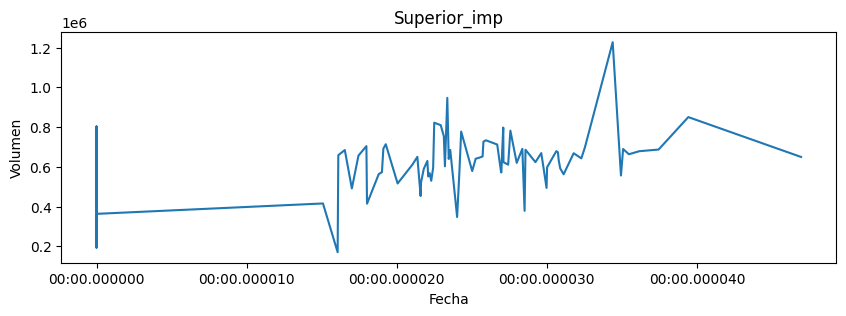

Diesel_imp — Inicio: 1970-01-01, Fin: 1970-01-01, Frecuencia: Mensual


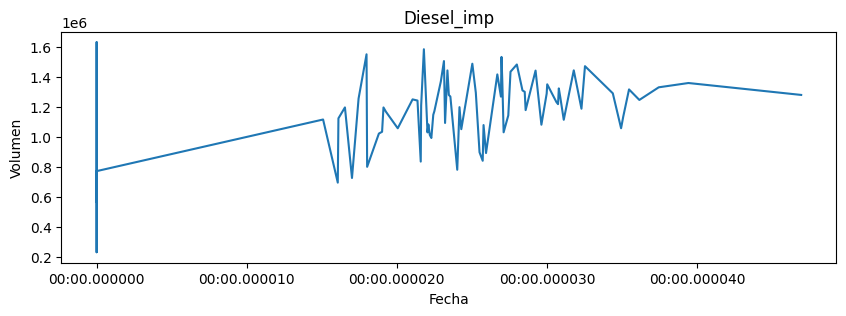

Regular_cons — Inicio: 1970-01-01, Fin: 1970-01-01, Frecuencia: Mensual


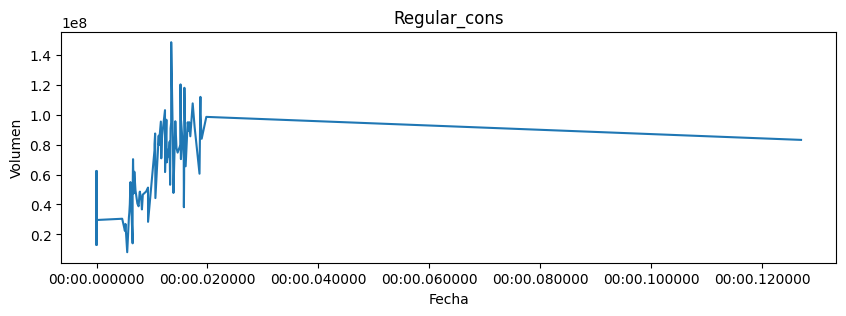

Superior_cons — Inicio: 1970-01-01, Fin: 1970-01-01, Frecuencia: Mensual


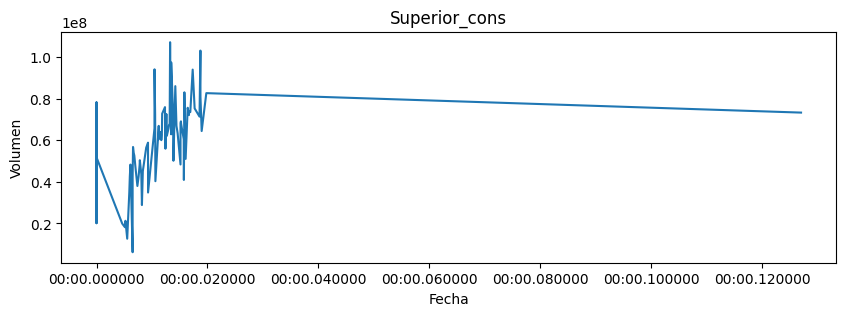

Diesel_cons — Inicio: 1970-01-01, Fin: 1970-01-01, Frecuencia: Mensual


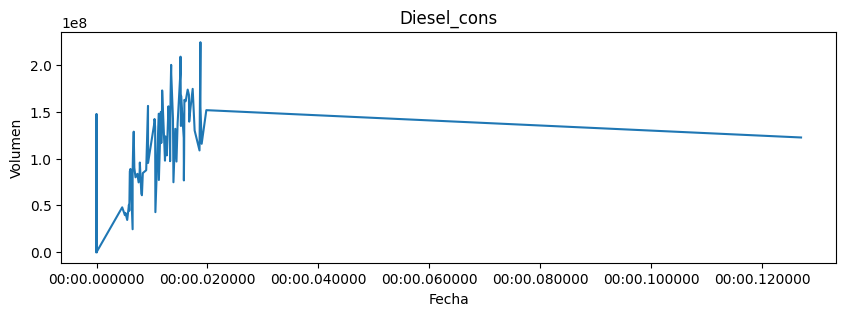

In [ ]:
import matplotlib.pyplot as plt

for df_ in (df_imp, df_cons):
    df_['Fecha'] = pd.to_datetime(df_['Fecha'], dayfirst=True, errors='coerce')
    df_.dropna(subset=['Fecha'], inplace=True)
    df_.set_index('Fecha', inplace=True)
    df_.sort_index(inplace=True)

df_imp['Diesel'] = df_imp[['Diesel bajo azufre','Diesel ultra bajo azufre','Diesel alto azufre']].sum(axis=1)
df_cons['Diesel'] = df_cons[['Diesel bajo azufre','Diesel ultra bajo azufre']].sum(axis=1)

series = {
    'Regular_imp':  df_imp['Gasolina regular'],
    'Superior_imp': df_imp['Gasolina superior'],
    'Diesel_imp':   df_imp['Diesel'],
    'Regular_cons': df_cons['Gasolina regular'],
    'Superior_cons':df_cons['Gasolina superior'],
    'Diesel_cons':  df_cons['Diesel']
}

for name, s in series.items():
    s = s.dropna()
    inicio, fin = s.index.min().date(), s.index.max().date()
    print(f"{name} — Inicio: {inicio}, Fin: {fin}, Frecuencia: Mensual")
    plt.figure(figsize=(10,3))
    plt.plot(s)
    plt.title(name)
    plt.xlabel('Fecha')
    plt.ylabel('Volumen')
    plt.show()

